# Bellabeat Capestone 

## About Bellabeat

Bellabeat is a tech-driven wellness company focused on empowering women through smart devices. The company was founded by Urška Sršen and Sando Mur and has established itself as a leader in health-focused technology.

**By 2016, Bellabeat had achieved the following milestones:**
 Opened offices worldwide, launched multiple products and made products available through online retailers and their e-commerce website.

## Marketing Efforts
Bellabeat emphasizes digital marketing, including active social media presence on Facebook, Instagram, and Twitter and display ads on the Google Display Network.

---

## Business Task

Urška Sršen, Bellabeat’s Chief Creative Officer, tasked the marketing analytics team to:
1. Analyze smart device usage data to uncover trends.
2. Apply these insights to one of Bellabeat’s products.
3. Recommend strategies to improve Bellabeat’s marketing efforts.

## Key Questions
- What trends are observed in smart device usage?
- How do these trends apply to Bellabeat’s target customers?
- How can these insights guide Bellabeat’s marketing strategies?

---

## Data Source

The primary dataset used is the **FitBit Fitness Tracker Data**. This dataset includes data from 30 Fitbit users and contains information about physical activity, heart rate, and sleep monitoring. It offers minute-level data for detailed analysis.

---

## Deliverables

The project deliverables include:

1. A summary of the business task.
2. Description of all data sources used.
3. Documentation of data cleaning and transformation.
4. Insights from the analysis.
5. Visualizations supporting key findings.
6. Recommendations for Bellabeat’s marketing strategy.


## Loading Packages 

In [1]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(conflicted) # I used this package because some functions in the dplyr were confilcted with tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Importing Datasets 

In [2]:
activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
intensities <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
sleep <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
heartrate <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

#### after importing the data i need to double check them, i checked them 1st on excel, and now using the head() and str() function to make sure that the data is consistent  

In [3]:
head(activity)
head(calories)
head(intensities)
head(sleep)
head(heartrate)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


,Id,ActivityHour,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,0.000000


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


In [4]:
str(activity)
str(calories)
str(intensities)
str(sleep)
str(heartrate)

'data.frame':	940 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr  "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : int  13162 10735 10460 9762 12669 9705 13019 15506 10544 9819 ...
 $ TotalDistance           : num  8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num  8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num  1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num  0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num  6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num  0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : int  25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : int  13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : int  328 217 181 209 221 164 233 264 205 211 ...
 $ SedentaryMinutes        : int  728 776 1218 726 773 539 

'data.frame':	22099 obs. of  3 variables:
 $ Id          : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : int  81 61 59 47 48 48 48 47 68 141 ...


'data.frame':	22099 obs. of  4 variables:
 $ Id              : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour    : chr  "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ TotalIntensity  : int  20 8 7 0 0 0 0 0 13 30 ...
 $ AverageIntensity: num  0.333 0.133 0.117 0 0 ...


'data.frame':	413 obs. of  5 variables:
 $ Id                : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr  "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : int  1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: int  327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : int  346 407 442 367 712 320 377 364 384 449 ...


'data.frame':	2483658 obs. of  3 variables:
 $ Id   : num  2.02e+09 2.02e+09 2.02e+09 2.02e+09 2.02e+09 ...
 $ Time : chr  "4/12/2016 7:21:00 AM" "4/12/2016 7:21:05 AM" "4/12/2016 7:21:10 AM" "4/12/2016 7:21:20 AM" ...
 $ Value: int  97 102 105 103 101 95 91 93 94 93 ...


#### so I noticed that the data type is (chr) which needs to be converted into date format and split the date and time

In [5]:
# activity
activity$ActivityDate=as.POSIXct(activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())
activity$date <- format(activity$ActivityDate, format = "%m/%d/%y")

# calories
calories$ActivityHour=as.POSIXct(calories$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
calories$time <- format(calories$ActivityHour, format = "%H:%M:%S")
calories$date <- format(calories$ActivityHour, format = "%m/%d/%y")

# intensities
intensities$ActivityHour=as.POSIXct(intensities$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
intensities$time <- format(intensities$ActivityHour, format = "%H:%M:%S")
intensities$date <- format(intensities$ActivityHour, format = "%m/%d/%y")

# sleep
sleep$SleepDay=as.POSIXct(sleep$SleepDay, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())
sleep$date <- format(sleep$SleepDay, format = "%m/%d/%y")

# heartrate aggregated by hour to reduce size and to be consistent with the other date
heartrate_hourly <- heartrate %>%
  mutate(Time = as.POSIXct(Time, format="%m/%d/%Y %I:%M:%S %p", tz=Sys.timezone())) %>%  # Convert Time to POSIXct
  mutate(Time = format(Time, "%Y-%m-%d %H:00:00")) %>%  # Round to the nearest hour
  mutate(Time = as.POSIXct(Time)) %>%  # Convert back to POSIXct
  group_by(Id, Time) %>%  # Group by user ID and hourly timestamp
  summarise(BPM = mean(Value, na.rm = TRUE), .groups = 'drop')  # Calculate average BPM per hour

#### now the data is cleaned, I'll proceed to find patterns, relationships and trends

## Finding patterns, relationships and trends

In [6]:
# we use n_distinct() to know the number of particpent in each dataset

n_distinct(activity$Id)
n_distinct(calories$Id)
n_distinct(intensities$Id)
n_distinct(sleep$Id)
n_distinct(heartrate_hourly$Id)

[1] 33

[1] 33

[1] 33

[1] 24

[1] 14

#### as we can see activity, calories and intensities have 33, sleep 24 and heartrate has 14 participent. While the heartrate data provides interesting insights, these findings should be interpreted cautiously due to the small sample size. 


In [7]:
# now we'll use summary() to look at the statistic of the data

# activity
activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()
# explore num of active minutes per category
activity %>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# calories
calories %>%
  select(Calories) %>%
  summary()

# sleep
sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

# heartrate_hourly
heartrate_hourly %>%
  summarise(
    Min_BPM = min(BPM, na.rm = TRUE),
    Max_BPM = max(BPM, na.rm = TRUE),
    Mean_BPM = mean(BPM, na.rm = TRUE),
    Median_BPM = median(BPM, na.rm = TRUE),
    SD_BPM = sd(BPM, na.rm = TRUE)
  )
# I used summarise() for calculating specific statistics with custom grouping, as required in this analysis.

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.000     Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.000     1st Qu.:361.0      1st Qu.:403.0  
 Median :1.000     Median :433.0      Median :463.0  
 Mean   :1.119     Mean   :419.5      Mean   :458.6  
 3rd Qu.:1.000     3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.000     Max.   :796.0      Max.   :961.0  

Min_BPM,Max_BPM,Mean_BPM,Median_BPM,SD_BPM
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
43.35404,161.5073,74.85052,72.5,14.64364


#### Let's dive into what this data tells us about our participants:

* The average step count is below the recommended 8,000 steps, suggesting many participants could benefit from increasing their daily walking.
* Sedentary lifestyle is the norm. On average, people spend a significant portion of their day sitting. This highlights a need to encourage more movement throughout the day.
* Not enough intense activity. The average time spent in very active minutes is low, indicating a lack of vigorous exercise.
* Sleep quality might be an issue. While the average sleep duration is decent, the difference between time in bed and actual sleep time suggests potential sleep disturbances.
  
#### On the plus side:

* Heart rates are generally healthy. The average resting heart rate is within a normal range.
* Some bursts of activity. The maximum heart rate indicates that participants do engage in more intense activities at times.

## Merging the datasets

In [8]:

# Merging activity and sleep datasets to explore the relationship between physical activity and sleep metrics.
# This will help analyze how different activity levels (e.g., steps, distance, and active minutes) might impact sleep duration and quality.
activity_sleep <- merge(activity, sleep, by=c('Id', 'date'))
head(activity_sleep)

# Merging intensities and calories datasets to study the correlation between activity intensity and calorie expenditure.
# This merge enables the exploration of whether higher intensity levels lead to burning more calories.
intensities_calories <- merge(intensities, calories, by=c('Id', 'date'))
head(intensities_calories)





,Id,date,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dttm>,<int>,<int>,<int>
1,1503960366,04/12/16,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,2016-04-12,1,327,346
2,1503960366,04/13/16,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2016-04-13,2,384,407
3,1503960366,04/15/16,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,2016-04-15,1,412,442
4,1503960366,04/16/16,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2016-04-16,2,340,367
5,1503960366,04/17/16,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,2016-04-17,1,700,712
6,1503960366,04/19/16,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,2016-04-19,1,304,320


,Id,date,ActivityHour.x,TotalIntensity,AverageIntensity,time.x,ActivityHour.y,Calories,time.y
,<dbl>,<chr>,<dttm>,<int>,<dbl>,<chr>,<dttm>,<int>,<chr>
1,1503960366,04/12/16,2016-04-12,20,0.333333,00:00:00,2016-04-12 00:00:00,81,00:00:00
2,1503960366,04/12/16,2016-04-12,20,0.333333,00:00:00,2016-04-12 01:00:00,61,01:00:00
3,1503960366,04/12/16,2016-04-12,20,0.333333,00:00:00,2016-04-12 02:00:00,59,02:00:00
4,1503960366,04/12/16,2016-04-12,20,0.333333,00:00:00,2016-04-12 03:00:00,47,03:00:00
5,1503960366,04/12/16,2016-04-12,20,0.333333,00:00:00,2016-04-12 04:00:00,48,04:00:00
6,1503960366,04/12/16,2016-04-12,20,0.333333,00:00:00,2016-04-12 05:00:00,48,05:00:00


## Vizualization

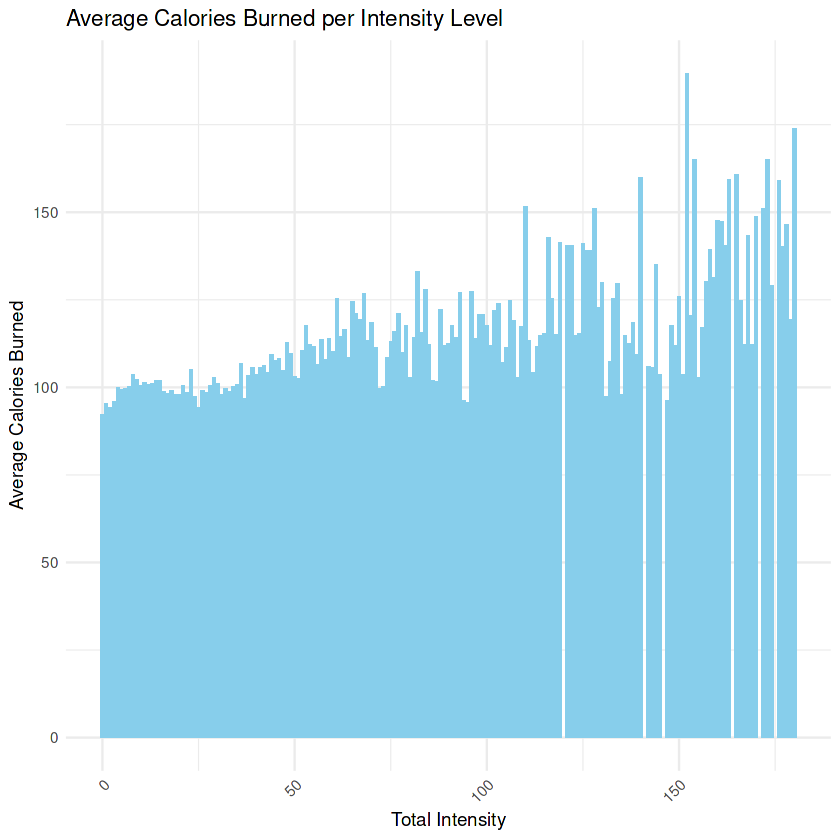

In [9]:
# Summarize the intensities_calories dataset to calculate average calories burned per intensity range
intensity_calories_summary <- intensities_calories %>%
  group_by(TotalIntensity) %>%
  summarise(AverageCalories = mean(Calories, na.rm = TRUE))

# Create a bar plot to show the relationship between intensity and calories burned
ggplot(data = intensity_calories_summary, aes(x = TotalIntensity, y = AverageCalories)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  theme_minimal() +
  labs(
    title = "Average Calories Burned per Intensity Level",
    x = "Total Intensity",
    y = "Average Calories Burned"
  ) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


as we can see here, there's a postive relation between high intensity and calories burned, which means we can market shorter intensity workouts to burn more calories

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


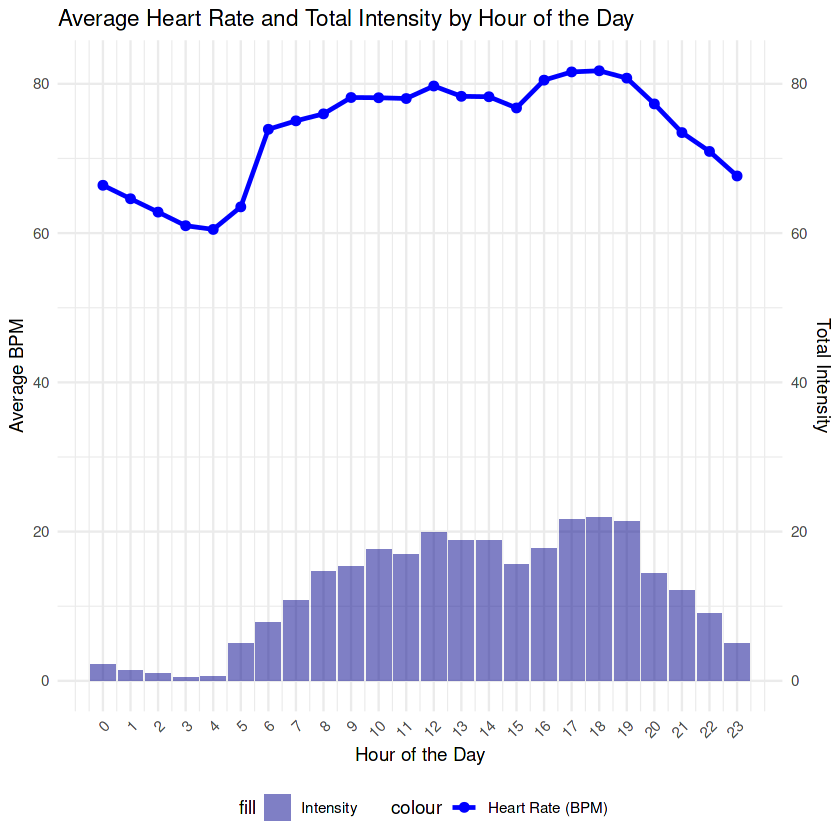

In [10]:
# Prepare the heart rate data
avg_hr_by_hour <- heartrate_hourly %>%
  mutate(hour = format(as.POSIXct(Time, format="%H:%M:%S"), "%H")) %>%
  group_by(hour) %>%
  summarize(avg_BPM = mean(BPM, na.rm = TRUE))

# Prepare the intensity data
int_new <- intensities %>%
  group_by(time) %>%
  drop_na() %>%
  summarise(mean_total_int = mean(TotalIntensity))

# Convert the 'hour' column in avg_hr_by_hour to a numeric format
avg_hr_by_hour$hour <- as.numeric(avg_hr_by_hour$hour)

# Convert the 'time' column in int_new to numeric hours
# Step 1: Convert 'time' to POSIXct datetime format using the hour-minute-second structure
# Step 2: Extract only the hour (e.g., "08:00:00" -> "08") 
# Step 3: Convert the extracted hour to a numeric value (e.g., "08" -> 8)
int_new$time <- as.numeric(format(as.POSIXct(int_new$time, format="%H:%M:%S"), "%H"))


# Merge the data
combined_data <- merge(avg_hr_by_hour, int_new, by.x = "hour", by.y = "time", all = TRUE)

# Plot both heart rate and total intensity on a single plot with dual axes
ggplot() +
  # Plot for Average Heart Rate
  geom_line(data = combined_data, aes(x = hour, y = avg_BPM, color = "Heart Rate (BPM)"), size = 1) +
  geom_point(data = combined_data, aes(x = hour, y = avg_BPM, color = "Heart Rate (BPM)"), size = 2) +
  
  # Plot for Average Total Intensity
  geom_bar(data = combined_data, aes(x = hour, y = mean_total_int, fill = "Intensity"), stat = "identity", alpha = 0.5) +
  
  # Labels and theme
  labs(
    title = "Average Heart Rate and Total Intensity by Hour of the Day",
    x = "Hour of the Day",
    y = "Average BPM"
  ) +
  scale_color_manual(values = c("Heart Rate (BPM)" = "blue")) +
  scale_fill_manual(values = c("Intensity" = "darkblue")) +
  theme_minimal() +
  
  # Add secondary y-axis for intensity
  scale_y_continuous(
    name = "Average BPM",
    sec.axis = sec_axis(~ ., name = "Total Intensity")
  ) +
  
  # Customize x-axis
  scale_x_continuous(breaks = 0:23) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme(legend.position = "bottom")


in this viz we analyzed total intensities and heartrate per hour, we can conclude that our particepnt are mostly active from 12:1 pm and 5:8 pm 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


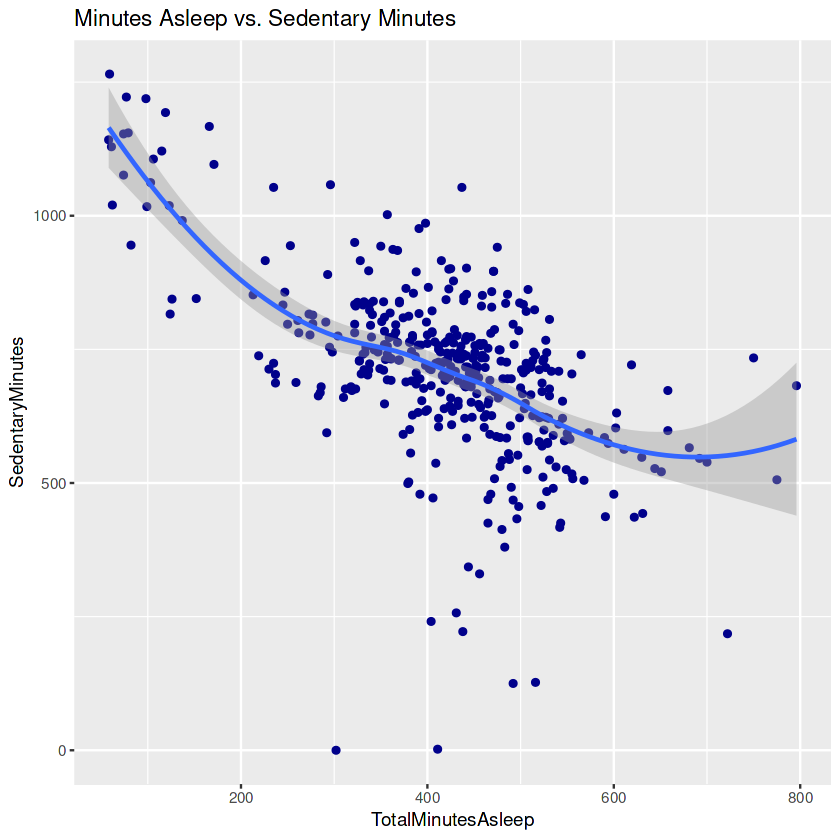

In [11]:
ggplot(data=activity_sleep, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) +  
geom_point(color='darkblue') + geom_smooth() +
  labs(title="Minutes Asleep vs. Sedentary Minutes")

as shown in the viz, there's a negative relation between inactivity and sleep time, which we can use to market more activity means better sleep, of course backed with more data and scientific research

## Conclusion and Recommendation for Marketing Strategy

 Bellabeat has done a great job tapping into the growing interest in health and wellness, particularly among women. However, there’s an opportunity to take it further by focusing on specific aspects like high-intensity workouts, better sleep, and personalized notifications based on activity patterns.

### Key Insights:

**High-Intensity Workouts**: High-intensity workouts are effective for burning calories and improving sleep quality. Bellabeat could integrate these into the app as personalized routines or challenges, possibly collaborating with fitness influencers for more engagement.

**Sleep and Activity Tracking**: Bellabeat’s ability to track both sleep and activity opens up opportunities to send personalized push notifications. Reminders to stay active during the day or engage in relaxation techniques before bed could enhance user experience.

**Personalized Notifications**: Based on user data, push notifications can be used to guide users toward better habits, like reminding them to move or wind down before sleep. This helps keep users engaged and creates a sense of daily support.

**Content Marketing and Community Engagement**: Sharing wellness tips, success stories, and expert advice can make Bellabeat more of a wellness partner, building a community around the brand. This can go beyond the product itself, encouraging deeper connections with users.

**Strategic Partnerships**: Partnering with other fitness and wellness brands could increase visibility and attract a wider audience. Co-branded events or integrated services could strengthen Bellabeat’s position in the market.

### Marketing Strategy Recommendations:

* Introduce high-intensity workout plans and challenges within the app to cater to fitness-focused users.
* Use data from sleep and activity tracking to send personalized reminders for staying active or relaxing before sleep.
* Build a strong content strategy around wellness, with tips, podcasts, and user stories.
* Foster partnerships with fitness brands to expand reach and offer users more value.
* Continuously gather user feedback to refine and improve the app and overall experience.
  
By focusing on these areas, Bellabeat can build stronger connections with users, improve engagement, and position itself as a leader in wellness technology for women.



#### Credit
This work is inspired by the Kaggle capstone project by Anastasia Chebotina. You can view her project here: <https://www.kaggle.com/code/chebotinaa/bellabeat-case-study-with-r> . Her research on marketing strategies for wellness products and fitness apps served as a valuable reference in shaping my approach.